Name: Muyo, Mark Danielle L.

In [ ]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout



In [ ]:
df = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
df


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


Convert the pixels into floating-point values.

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale


We are converting the pixel values into floating-point values to make the predictions. Changing the numbers into grayscale values will be beneficial as the values become small and the computation becomes easier and faster. As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1

In [ ]:
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)


Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


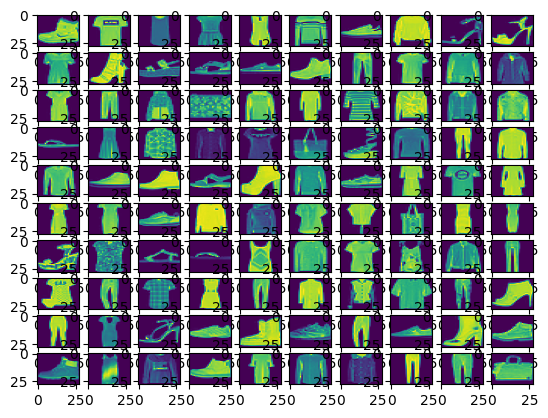

In [ ]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
	for j in range(10):
		ax[i][j].imshow(x_train[k].reshape(28, 28, 1),
						aspect='auto')
		k += 1
plt.show()


In [ ]:
# Form the Input, hidden, and output layers.

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=20,
		batch_size=64,
		validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1678 - accuracy: 0.9361 - val_loss: 0.2360 - val_accuracy: 0.9213
Epoch 2/20
750/750 [==============================] - 3s 3ms/step - loss: 0.1645 - accuracy: 0.9378 - val_loss: 0.2426 - val_accuracy: 0.9224
Epoch 3/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1604 - accuracy: 0.9386 - val_loss: 0.2401 - val_accuracy: 0.9197
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1569 - accuracy: 0.9401 - val_loss: 0.2363 - val_accuracy: 0.9223
Epoch 5/20
750/750 [==============================] - 3s 3ms/step - loss: 0.1534 - accuracy: 0.9416 - val_loss: 0.2481 - val_accuracy: 0.9204
Epoch 6/20
750/750 [==============================] - 3s 3ms/step - loss: 0.1498 - accuracy: 0.9420 - val_loss: 0.2449 - val_accuracy: 0.9233
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1457 - accuracy: 0.9440 - val_loss: 0.2432 - val_accuracy: 0.9229
Epoch 

In [ ]:
results = model.evaluate(x_test, y_test, verbose = 1)
print('test loss, test acc:', results)


313/313 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.9184
test loss, test acc: [0.3657247722148895, 0.91839998960495]


We got the **accuracy** of our model 91% by using ```model.evaluate()``` on the test samples.

# Source:

https://keras.io/api/datasets/fashion_mnist/